**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

Solutions.

* These formulas describe a discrete distribution, because $\sum_{k = 1}^{\infty} \frac{1}{4 k (k + 1)} = \frac{1}{4}$, because of that we can easily see that $\sum_{k = -\infty}^{\infty} P(X = k) = \frac{1}{4} + \frac{1}{2} + \frac{1}{4} = 1$ and this completes the proof.
* Mean (expected value) of $X$ doesn't exist, because by definition $E[X] = E[X^+] + E[X^-] + E[X=0]$, and by divergence of $\zeta(1)$ we can see that $E[X]$ is not well defined.
* Plotting graph $f(k) = P(X = k)$ for $k \in [-10, 10]$:

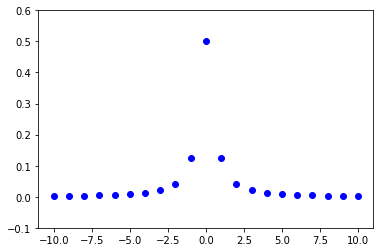

In [90]:
import numpy as np
import matplotlib.pyplot as plt
def f(k):
    if k == 0:
        return 1/2
    else:
        return (1/(4*abs(k)*(abs(k) + 1)))

arguments = np.arange(-10, 11, 1)
value = np.array([f(x) for x in arguments])
plt.plot(arguments, value,'bo')
plt.axis([-11, 11, -0.1, 0.6])
plt.show()

* First we'd like to calculate $F_{X}(t)$, then we can easily sample from $X$ with $U \sim unif(0, 1)$. If $U \in [\frac{1}{4}, \frac{3}{4}]$ we can assume we sampled $0$ (with probability $\frac{1}{2}$, because $\frac{\mu([\frac{1}{4}, \frac{3}{4}])}{\mu([0, 1])} = \frac{1}{2}$). Then if $U > \frac{3}{4}$ we can assume that the result of our sampling will be a positive integer, else if $U < \frac{1}{4}$ we can assume, that the result will be negative integer. We can calculate, that $\sum_{k=1}^{n} \frac{1}{4k(k+1)} = \frac{n}{4n + 4}$ and set $U := U - \frac{3}{4}$ (So now $U \in (0, \frac{1}{4}]$). We can try to squeeze $U$ like this: $\frac{n}{4n + 4} \le U \le \frac{n+1}{4(n+1) + 4} = \frac{n+1}{4n + 8}$. By performing some arithmetic operations, we can transform this inequality into: $n \le \frac{4U}{1-4U} \le n + 1$, and by simply taking ceil of the expression in the middle we can get our sample. We can perform simillar opertions when $U < \frac{1}{4}$, just by using symmetry ($X$ is an even function) we get the result that our sample is equal to the floor of expression $\frac{4U}{4U - 1}$. If we get $U = 0$ or $U = 1$ we can easily ignore this and generate random number again (no worries, because $\mu(\{0, 1\}) << \mu([0, 1])$, so it'll take basically constant amout of repeated generations). Python's np.random.uniform(last, end) draws from range [last, end), but $\{$end$\}$ is a set of measure zero.

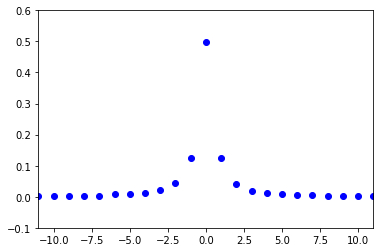

In [91]:
#samples from X with given U or randomly with randomly generated U
def single_sample(U = 0):
    while U <= 0 or U >= 1:
        U = np.random.uniform(0, 1)
    if (U > 3./4.):
        U = U - 0.75
        return int(np.ceil((4*U)/(1-4*U)))
    elif (U < 1./4.):
        return int(np.floor((4*U)/(4*U - 1)))
    else:
        return 0
    
def generate_samples(num):
    samples = np.random.uniform(0, 1, num)
    samples = np.vectorize(single_sample)(samples)
    return samples

siz = 10000
samples = generate_samples(siz)
dic = dict()

for x in samples:
    dic[x] = 0.
    
for x in samples:
    dic[x] = dic[x] + 1.

for k in dic.keys():
    dic[k] = dic[k] / siz
    
plt.plot(dic.keys(), dic.values(), 'bo')
plt.axis([-11, 11, -0.1, 0.6])
plt.show()

* Computing $\bar{x}_i$ and plotting them:

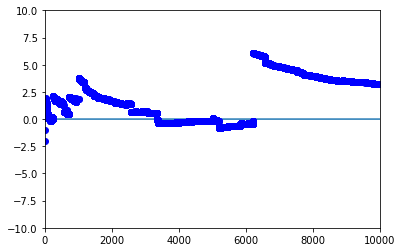

In [92]:
partial_sums = np.cumsum(samples)

x_dash = np.zeros(siz)

for i in range(0, siz):
    x_dash[i] = partial_sums[i]/(i+1)

plt.plot(range(0, siz), np.zeros(siz))
plt.plot(range(0, siz), x_dash, 'bo')
plt.axis([0, siz, -10, 10])
plt.show()

* For me it doesn't look like the series would converge (Especially, because $\frac{x_i}{i} \sim \frac{i \cdot E[X]}{i} = E[X]$ and we proved that $E[X]$ doesn't exist).
* Plotting another $\bar{x}_i$:

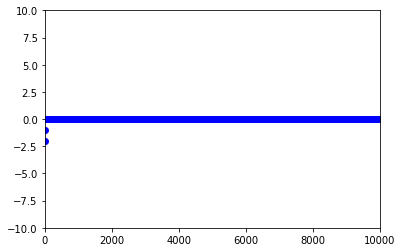

In [93]:
x_dash = np.zeros(siz)
for i in range(0, siz):
    x_dash[i] = np.median(samples[:i+1])
    
plt.plot(range(0, siz), np.zeros(siz))
plt.plot(range(0, siz), x_dash, 'bo')
plt.axis([0, siz, -10, 10])
plt.show()

* Now it looks like series converges. It makes sense, because about half of samples are equal to zero, and the rest of the elements are approximately evenly spread between being positive and negative (So the positive $\approx \frac{1}{4}$ cancells with negative $\approx \frac{1}{4}$ and there are basically only zeroes left).

* Let's put Y = X + c, for randomly generated c

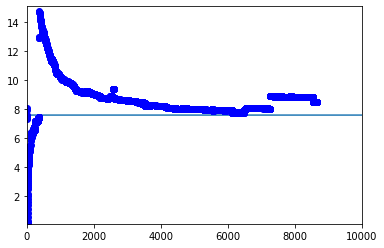

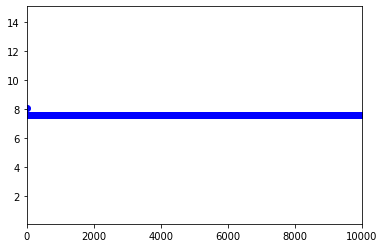

In [96]:
c = np.random.uniform(-10, 10)

new_siz = siz

def new_single_sample(U = 0):
    return single_sample(U) + c

def new_generate_samples(num):
    samples = np.random.uniform(0, 1, num)
    samples = np.vectorize(new_single_sample)(samples)
    return samples


new_samples = new_generate_samples(new_siz)

new_partial_sums = np.cumsum(new_samples)

new_x_dash = np.zeros(siz)

for i in range(0, siz):
    new_x_dash[i] = new_partial_sums[i]/(i+1)

plt.plot(range(0, siz), np.full(siz, c))
plt.plot(range(0, siz), new_x_dash, 'bo')
plt.axis([0, siz, -7.5 + c, 7.5 + c])
plt.show()

new_x_dash = np.zeros(siz)

for i in range(0, siz):
    new_x_dash[i] = np.median(new_samples[:i+1])
    
plt.plot(range(0, siz), np.full(siz, c))
plt.plot(range(0, siz), new_x_dash, 'bo')
plt.axis([0, siz, -7.5 + c, 7.5 + c])
plt.show()

* As expected second method finds c in a much better way with same reasoning as before.